<a href="https://colab.research.google.com/github/SitiZumarohdf/PCVK_Genap_2023/blob/main/Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import folder yang ada di Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Import Library**


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Membuat  fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element 
Dilasi (SED) berbentuk cross 3 x 3 **tanpa menggunakan library** morphology dari 
openCV

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


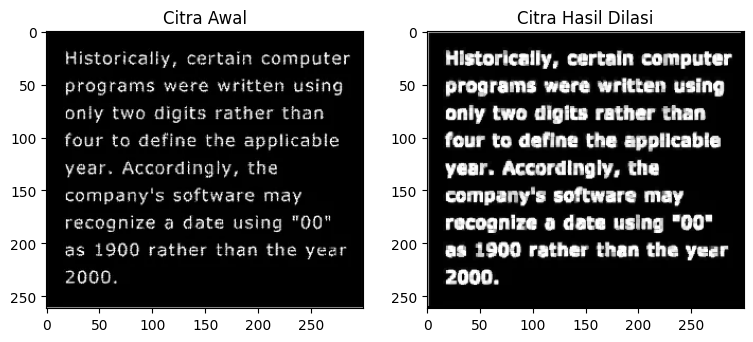

In [ ]:
# DILASI TANPA LIBRARY

# Input image
input_dilasi_no_library = cv2.imread('/content/drive/MyDrive/PCVK/Image/morphology.png')
input_dilasi_no_library = cv2.cvtColor(input_dilasi_no_library, cv2.COLOR_BGR2GRAY)

# Membuat struktur element berbentuk square 3x3
se = np.ones((3,3))

def morph_dilate(img, kernel):
    # Menentukan baris dan kolom citra
    rows = img.shape[0]
    cols = img.shape[1]
    dilate_img=np.zeros((rows,cols))

    newimg=np.zeros((img.shape[0]+2,img.shape[1]+2))
    newimg[1:-1,1:-1]=img
    for x in range(0,rows-(kernel.shape[0]-1)):
        for y in range(0,cols-kernel.shape[0]-1):
            dilate_img[x,y]=np.max(se * newimg[x:x+kernel.shape[0],y:y+kernel.shape[0]])

    return dilate_img

# Citra hasil dilasi
output_dilasi_no_library = morph_dilate(input_dilasi_no_library, se)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(9,5))

# menampilkan structuring element
print(se)

# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_dilasi_no_library, cmap='gray')

# Menampilkan citra hasil dilasi
axs[1].set_title("Citra Hasil Dilasi")
axs[1].imshow(output_dilasi_no_library, cmap='gray')

Membuat program implementasi operasi dilasi Structuring Element Dilasi (SED) 
berbentuk cross 3 x 3 **dengan menggunakan library** morphology dari openCV

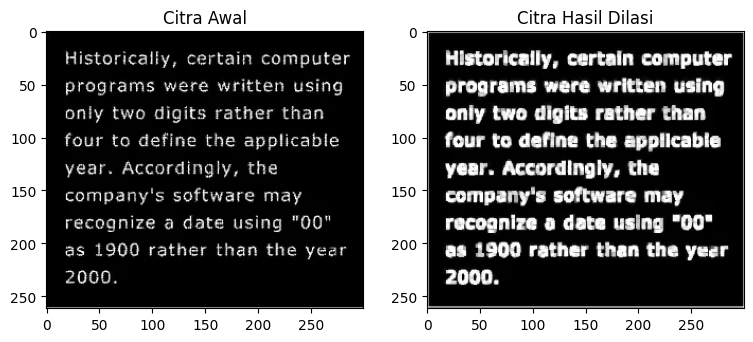

In [ ]:
# DILASI DENGAN MENGGUNAKAN LIBRARY

# Input image
input_dilasi_with_library = cv2.imread('/content/drive/MyDrive/PCVK/Image/morphology.png')

# Membuat struktur element berbentuk square 3x3
se = np.ones((3,3))

# Hasil dilasi menggunakan library opencv morphology
output_dilasi_with_library = cv2.morphologyEx(input_dilasi_with_library, cv2.MORPH_DILATE, se)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(9,5))

# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_dilasi_with_library)

# Menampilkan citra hasil dilasi
axs[1].set_title("Citra Hasil Dilasi")
axs[1].imshow(output_dilasi_with_library)

Membuat h fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element 
Erosi (SE) berbentuk square 5 x 5 **tanpa menggunakan library** morphology dari 
openCV

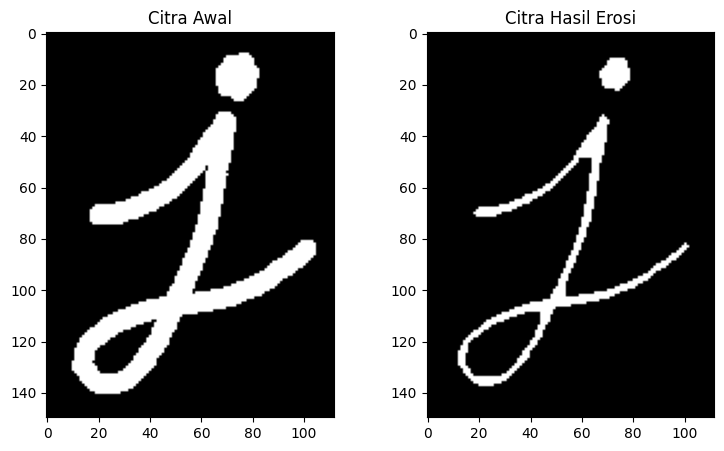

In [ ]:
# EROSI TANPA LIBRARY

# Input image
input_erosi_no_library = cv2.imread('/content/drive/MyDrive/PCVK/Image/j.png')
input_erosi_no_library = cv2.cvtColor(input_erosi_no_library, cv2.COLOR_BGR2GRAY)

# Membuat struktur element berbentuk square 5x5
se = np.ones((5,5))

def morph_erode(img, kernel):
    # Menentukan baris dan kolom citra
    rows = img.shape[0]
    cols = img.shape[1]
    erode_img=np.zeros((rows,cols))

    newimg=np.zeros((img.shape[0]+2,img.shape[1]+2))
    newimg[1:-1,1:-1]=img
    for x in range(0,rows-(kernel.shape[0]-1)):
        for y in range(0,cols-(kernel.shape[0]-1)):
            erode_img[x,y]=np.min(se * newimg[x:x+kernel.shape[0],y:y+kernel.shape[0]])
    return erode_img

# Citra hasil erosi
output_erosi_no_library = morph_erode(input_erosi_no_library, se)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(9,5))

# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_erosi_no_library, cmap='gray')

# Menampilkan citra hasil erosi
axs[1].set_title("Citra Hasil Erosi")
axs[1].imshow(output_erosi_no_library, cmap='gray')

Membuat program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk 
square 5 x 5 **dengan menggunakan library** morphology dari openCV

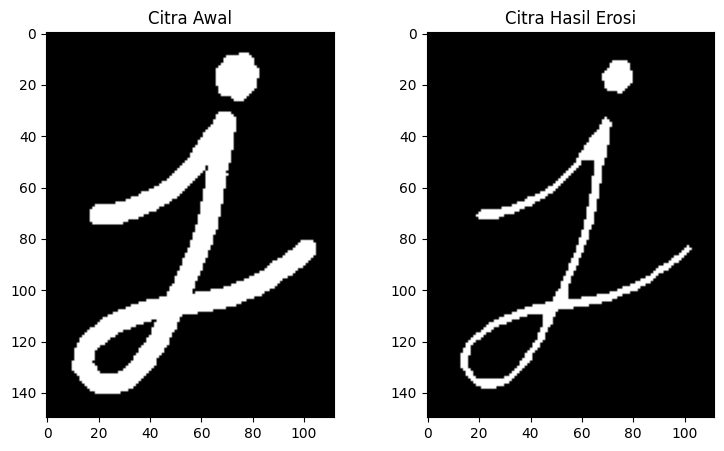

In [ ]:
# EROSI DENGAN MENGGUNAKAN LIBRARY

# Input image
input_erosi_with_library = cv2.imread('/content/drive/MyDrive/PCVK/Image/j.png')

# Membuat structured element berbentuk square 5x5
se = np.ones((5,5))

# Hasil erosi menggunakan library opencv morphology
output_erosi_with_library = cv2.morphologyEx(input_erosi_with_library, cv2.MORPH_ERODE, se)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(9,5))

# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_erosi_with_library)

# Menampilkan citra hasil erosi
axs[1].set_title("Citra Hasil Erosi")
axs[1].imshow(output_erosi_with_library)

Membuat program implementasi operasi opening dengan Structuring Element 
berbentuk square 3 x 3 **tanpa dan dengan** menggunakan library morphology dari 
openCV

<ipython-input-12-eebfe8b3fd66>:49: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img7, cmap="gray"),plt.title('Citra Awal')


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

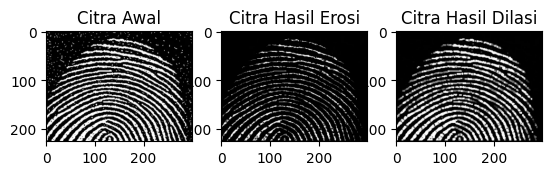

In [12]:
#TANPA MENGGUNAKAN LIBRARY
# Membaca image untuk operasi erosi
img7 = cv2.imread('/content/drive/MyDrive/PCVK/Image/fingerprint.png', 0)

#Acquire size of the image
m, n = img7.shape

#Show the image
plt.imshow(img7, cmap="gray")

# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Define new image
imgErode = np.zeros((m,n), dtype=np.uint8)

#Proses Dilasi
for i in range(constant, m-constant): #constant adalah tipe variable yang nilainya tidak dapat diubah
  for j in range(constant,n-constant):
    temp = img7[i-constant:i+constant+1, j-constant:j+constant+1] #temp digunakan untuk menampung atau menyimpan data untuk sementara
    product = temp * SE
    imgErode[i,j] = np.min(product)

#Read the image for dilation
img7_2 = imgErode

#Acquire size of the image
p, q= img7_2.shape

#Show the image
plt.imshow(img7_2, cmap="gray")

#Define new image to store the pixels of dilated image
imgDilate = np.zeros((p,q), dtype=np.uint8)

#Define the structuring element 
SED = np.array([[1,1,1], [1,1,1], [1,1,1]])
constant1 = 1

#Dilation operation without using inbuilt cv2 function
for i in range(constant1, p-constant1): #baris
  for j in range(constant1,q-constant1): #kolom
    temp = img7_2[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

plt.subplot(131),plt.imshow(img7, cmap="gray"),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Erosi')
plt.subplot(133),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Dilasi')

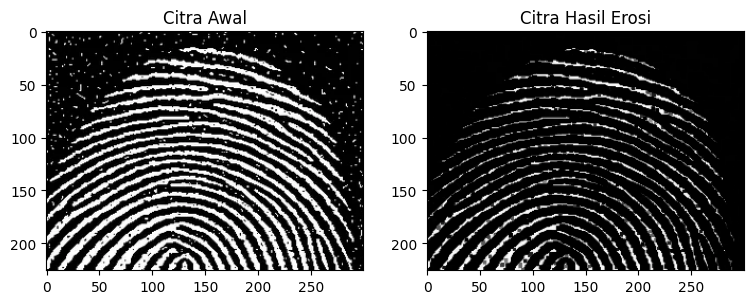

In [15]:
# DENGAN MENGGUNAKAN LIBRARY
# Input image
input_opening_erosi_with_library = cv2.imread('/content/drive/MyDrive/PCVK/Image/fingerprint.png')

# Membuat structured element berbentuk square 3x3
se = np.ones((3,3))

# Hasil erosi menggunakan library opencv erode()
output_opening_erosi_with_library = cv2.morphologyEx(input_opening_erosi_with_library, cv2.MORPH_ERODE, se)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(9,5))

# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_opening_erosi_with_library)

# Menampilkan citra hasil erosi
axs[1].set_title("Citra Hasil Erosi")
axs[1].imshow(output_opening_erosi_with_library)

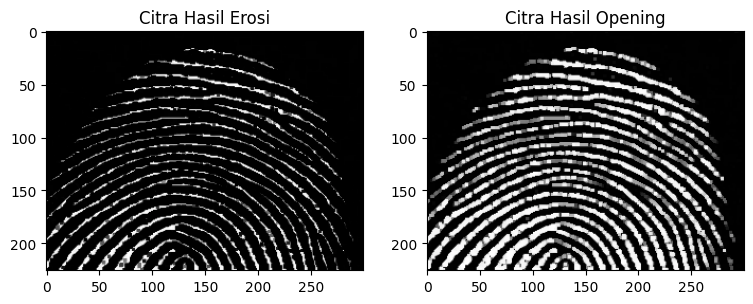

In [16]:
# Dilasi dengan library opencv

# Input image
input_opening_dilasi_with_library = output_opening_erosi_with_library

# Membuat structured element berbentuk square 3x3
se = np.ones((3,3))

# Hasil dilasi menggunakan library opencv dilate()
output_opening_dilasi_with_library= cv2.morphologyEx(input_opening_dilasi_with_library, cv2.MORPH_DILATE, se)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(9,5))

# Menampilkan citra awal
axs[0].set_title("Citra Hasil Erosi")
axs[0].imshow(input_opening_dilasi_with_library)

# Menampilkan citra hasil dilasi
axs[1].set_title("Citra Hasil Opening")
axs[1].imshow(output_opening_dilasi_with_library)

Membuat program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 **tanpa dan dengan** menggunakan library morphology dari openCV

In [ ]:
#Read the image for dilation
img8 = cv2.imread('/content/drive/MyDrive/PCVK/Image/fingerprint.png', 0)

#Acquire size of the image
p, q = img8.shape

#Show the image
plt.imshow(img8, cmap="gray")

#Define new image to store the pixels of dilated image
imgDilate = np.zeros((p,q), dtype=np.uint8)

#Define the structuring element 
SED = np.array([[1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1]])
constant1 = 3

#Dilation operation without using inbuilt CV2 function
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = img8[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

#Read the image for erosion
img8_2 = imgDilate

#Acquire size of the image
m, n= img8_2.shape 

#Show the image
plt.imshow(img8_2, cmap="gray")

# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Define new image
imgErode = np.zeros((m,n), dtype=np.uint8)

#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp = img8_2[i-constant:i+constant+1, j-constant:j+constant+1]
    product = temp * SE
    imgErode[i,j] = np.min(product)

plt.subplot(131),plt.imshow(img8, cmap="gray"),plt.title('Citra Awal')
plt.subplot(133),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Dilasi')
plt.subplot(132),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Erosi')
     